In [496]:
from main import run_sql_query
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


carrier_color_dict = {
                        'Verizon': '#b00000',
                        'AT&T': '#067ab4',
                        'T-Mobile': '#e60076',
                        'Sprint': '#ffaa00',
                        'Dish': '#3F3F3F',
                        'EE': '#2e9b9d',
                        'O2': '#010066',
                        'Three': '#000000',
                        'Vodafone': '#f80000',
                        'O2 UK': '#010066',
                        'Three UK': '#000000',
                        'Vodafone UK': '#f80000',
                        'Sunrise': '#d0606f',
                        'Swisscom': '#5b92cc',
                        'Salt': '#56bf83',
                        'ODIDO': '#FF7621',
                        'KPN': '#FFBB00',
                        'Vodafone NL': '#f80000',
                        'KT': '#FF7621',
                        'SK Telecom': '#FFBB00',
                        'LG U+': '#f80000'
                     }



def get_ranked_markets():
    ranked_markets = f"""
    SELECT * 
    FROM reporting.vi_rank_stats
    JOIN auto.vi_collection_status_reporting
    ON reporting.vi_rank_stats.csid = auto.vi_collection_status_reporting.collection_set_id
    WHERE collection_set_status_id = 20
    AND product_period = '2025-1H'
    AND csid = 12612
    """
    df_ranked_markets = pd.read_sql(ranked_markets, con=os.getenv('RSR_SVC_CONN'))
    
    return df_ranked_markets


df_ranked_markets = get_ranked_markets()
df_ranked_markets_table = df_ranked_markets[['csid', 'collection_area', 'ridx', 'carrier1', 'rs95', 'rank1']]
df_ranked_markets_table = df_ranked_markets_table.drop_duplicates()
df_ranked_markets_table.rename(columns={
    'csid': 'Collection Set ID',
    'collection_area': 'Collection Area',
    'ridx': 'KPI',
    'carrier1': 'Carrier',
    'rs95': 'RS95',

    'rank1' : 'Rank'
}, inplace=True)


# df_ranked_markets_table

bar_colors = [carrier_color_dict[carrier] for carrier in df_ranked_markets_table['Carrier']]


Helper function that filters df by column value

In [497]:
def filter_df_by_kpi(df, column_name, kpi):
    if column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found in the DataFrame. Returning empty DataFrame.")
        return pd.DataFrame(columns=df.columns) 

    filtered_df = df[df[column_name] == kpi]
    return filtered_df

In [498]:
def plot_ranked_markets(df, x_col, title="", save_path="images.png"):

    df_sorted = df.sort_values(by=x_col, ascending=False).copy()

    bars = plt.barh(df_sorted['Carrier'], df_sorted['RS95'],
                    color=bar_colors)
    
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.5)

    for bar in bars:

        width = bar.get_width()
        ypos = bar.get_y() + bar.get_height() / 2
        xpos = bar.get_x() 
        label = f"{width:.1f}" 

        plt.text(xpos + 1,  
                ypos,
                label,
                va='center', 
                ha='left',   
                color='white', 
                fontsize=10,
                fontweight='bold'
                )

    plt.xlim(0, max(df['RS95']) * 1.1) 

    plt.tight_layout()

    plt.savefig(save_path)
    plt.show()

DATA

In [499]:
df_data_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Data')
df_data_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
0,12612,"Los Angeles, CA",Data,T-Mobile,99.732460,1
2,12612,"Los Angeles, CA",Data,Verizon,99.625445,2
4,12612,"Los Angeles, CA",Data,AT&T,99.597687,2


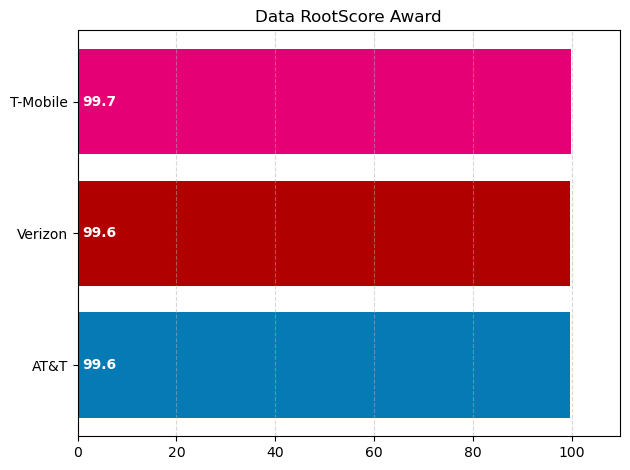

In [500]:
plot_ranked_markets(df_data_rank, 'RS95', 'Data RootScore Award', save_path=os.path.join(images_folder, 'data_rank.png'))

CALL

In [501]:
df_call_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Call')
df_call_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
6,12612,"Los Angeles, CA",Call,AT&T,99.826907,1
8,12612,"Los Angeles, CA",Call,Verizon,99.292293,2
10,12612,"Los Angeles, CA",Call,T-Mobile,97.807610,3


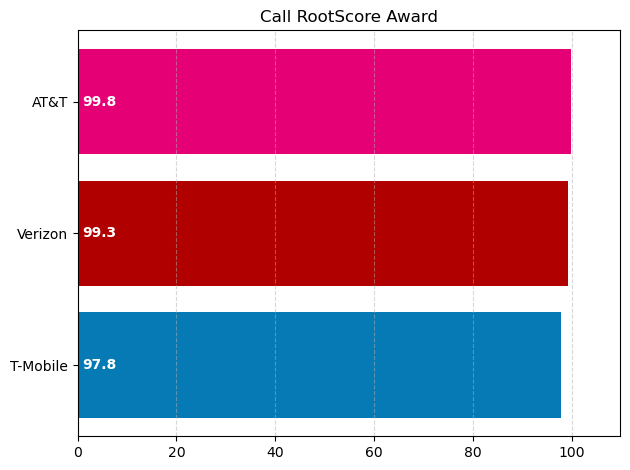

In [502]:
plot_ranked_markets(df_call_rank, 'RS95', 'Call RootScore Award', save_path=os.path.join(images_folder, 'call_rank.png'))

TEXT

In [503]:
df_text_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Text')
df_text_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
12,12612,"Los Angeles, CA",Text,Verizon,99.805484,1
14,12612,"Los Angeles, CA",Text,AT&T,99.346275,1
16,12612,"Los Angeles, CA",Text,T-Mobile,99.193893,1


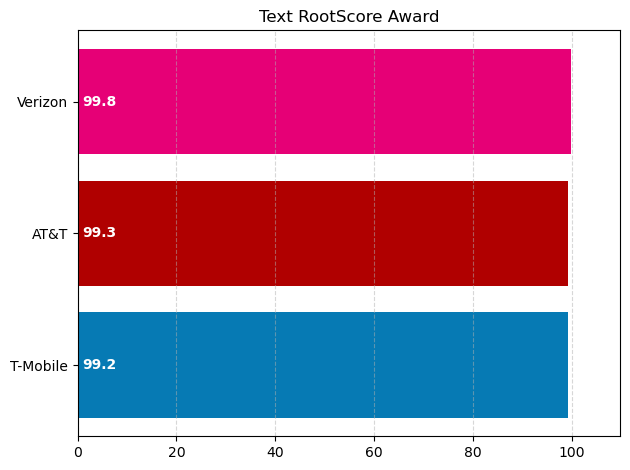

In [504]:
plot_ranked_markets(df_text_rank, 'RS95', 'Text RootScore Award', save_path=os.path.join(images_folder, 'text_rank.png'))

RELIABILITY

In [505]:
df_reliability_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Reliability')
df_reliability_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
18,12612,"Los Angeles, CA",Reliability,AT&T,99.785794,1
20,12612,"Los Angeles, CA",Reliability,Verizon,99.680510,2
22,12612,"Los Angeles, CA",Reliability,T-Mobile,99.392370,3


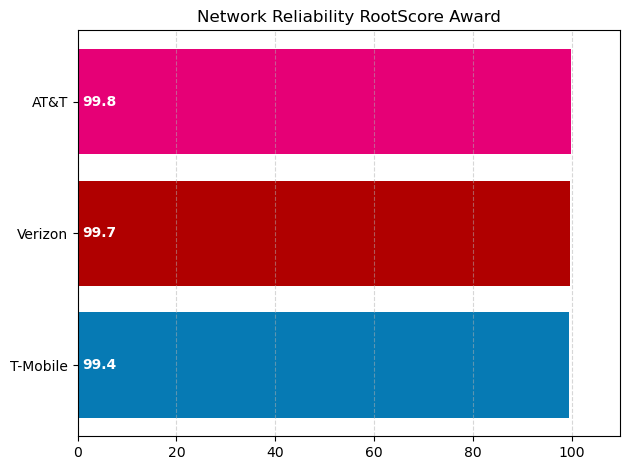

In [506]:
plot_ranked_markets(df_reliability_rank, 'RS95', 'Network Reliability RootScore Award', save_path=os.path.join(images_folder, 'reliability_rank.png'))

SPEED

In [507]:
df_speed_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Speed')
df_speed_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
24,12612,"Los Angeles, CA",Speed,T-Mobile,99.993930,1
26,12612,"Los Angeles, CA",Speed,AT&T,99.842433,2
28,12612,"Los Angeles, CA",Speed,Verizon,99.832535,2


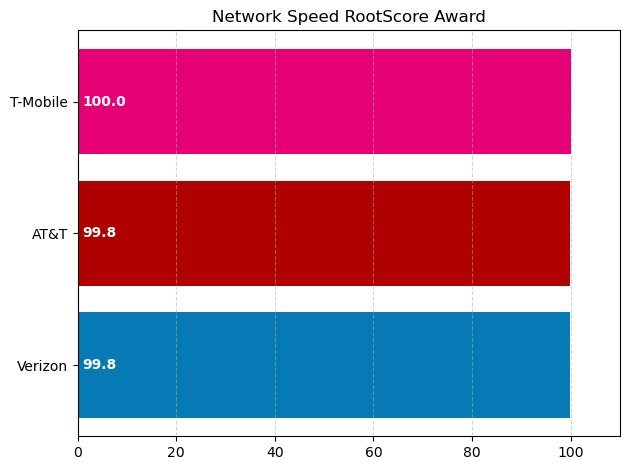

In [508]:
plot_ranked_markets(df_speed_rank, 'RS95', 'Network Speed RootScore Award', save_path=os.path.join(images_folder, 'speed_rank.png'))

OVERALL

In [509]:
df_overall_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Overall')
df_overall_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
30,12612,"Los Angeles, CA",Overall,AT&T,99.458556,1
32,12612,"Los Angeles, CA",Overall,Verizon,99.376546,1
34,12612,"Los Angeles, CA",Overall,T-Mobile,99.139825,3


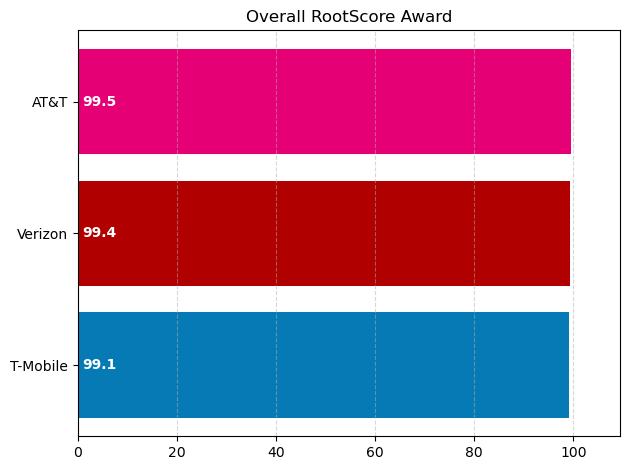

In [510]:
plot_ranked_markets(df_overall_rank, 'RS95', 'Overall RootScore Award', save_path=os.path.join(images_folder, 'overall_rank.png'))

RESPONSIVENESS

In [511]:
df_responsiveness_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Responsiveness')
df_responsiveness_rank.head()

,Collection Set ID,Collection Area,KPI,Carrier,RS95,Rank
36,12612,"Los Angeles, CA",Responsiveness,Verizon,98.829416,1
38,12612,"Los Angeles, CA",Responsiveness,T-Mobile,98.841597,1
40,12612,"Los Angeles, CA",Responsiveness,AT&T,98.591344,1


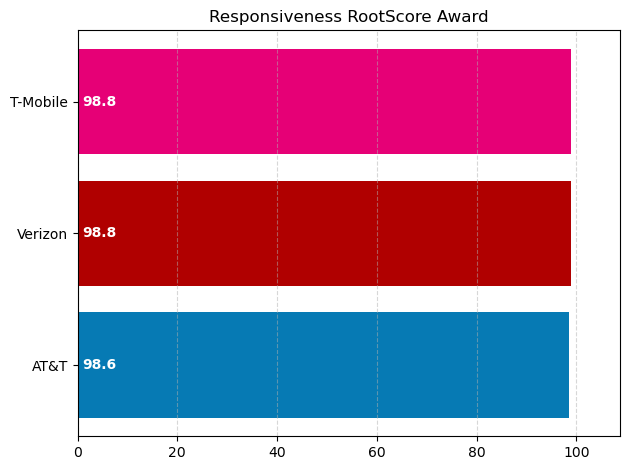

In [512]:
plot_ranked_markets(df_responsiveness_rank, 'RS95', 'Responsiveness RootScore Award', save_path=os.path.join(images_folder, 'responsiveness_rank.png'))

VIDEO

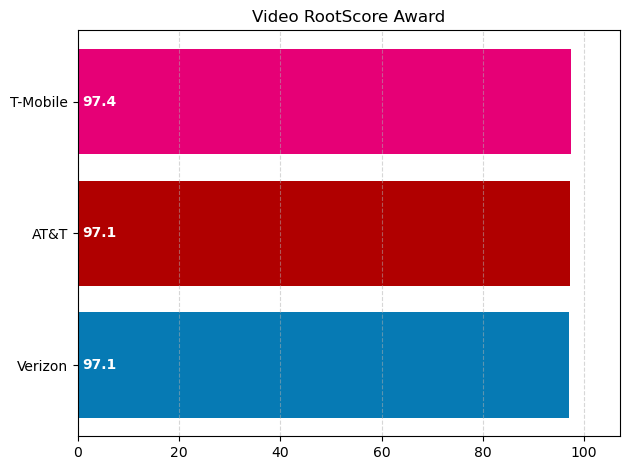

In [513]:
df_video_rank = filter_df_by_kpi(df_ranked_markets_table, 'KPI', 'Video')
df_video_rank.head()
plot_ranked_markets(df_video_rank, 'RS95', 'Video RootScore Award', save_path=os.path.join(images_folder, 'video_rank.png'))